# Internal Waves

Internwal waves occur in density stratified fluids because of gravitational restoring forces acting on vertically displaced fluid. First consider tthe theory behind these waves:

## Theory
Assume the Boussinesq approximation and f-plane approximations. Variations in the vertical density gradient can be seen in the buoyancy frequency, $N$, $$N^2 = -\frac{g}{\rho_0}\frac{d\rho}{dz}.$$
If $N$ is constant, then plane wave solutions of the form $$e^{kx + ly+mz-\omega t}$$ satisfy ther dispersion relation:$$\omega^2 = \frac{N^2k_h^2 + f^2m^2}{k_h^2+m^2}$$
for $k_h = k^2+l^2$. $\omega$ depends only on the direction $\vec{k} = (k,l,m)$, and must be $f < \omega<N$. Wave energy propagates in the direction of the group velocity $\vec{c}_g=\nabla _k\omega(\vec{k})$, which is inherently perpendicular to $\vec{k}$.

If we assumed it was non-rotational, then have the simplified: $$\omega^2 = \frac{N^2k_h^2}{k_h^2+m^2}.$$ Let $\alpha$ be the angle between $\vec{k}$ and the horizontal, and $\beta$ the angle between $\vec{c}_g$ and the horizontal, such that $\alpha = \pi - \beta$. Then, using trigonometry, 
$$\cos(\alpha) = \frac{k_h}{\sqrt{k_h^2+m^2}}$$
$$\sin(\beta) = \frac{k_h}{\sqrt{k_h^2+m^2}}$$
$$\sin^2(\beta) = \frac{k_h^2}{k_h^2+m^2}$$
Therefore, we can write the dispersion relation as, $$\omega^2 = N^2\sin^2(\beta).$$ So, given a stratification and frequency, waves will propagate ata specific angle with respect to the vertical. And low frequency waves will propagate at low angles, while high frequency waves propagate at steeper angles. If you have a packet of waves all traveling at the same angle, they must also have the same frequency, and if you have something that causes the frequency to change, the angle of the wave will change too! ** The Angle dependence still holds for the rotational case, there is just an added trig term. It's easier to see the dependence though, by looking at the irrotational case.

## Reflection

Now when internal waves reflect from a boundary, the reflected and incident beams will maintain the same frequency which means, based on our dispersion relation, they keep the same angle with respect to the horizontal. Let the slope of topography be $s = \tan(\theta)$ and the slope of the incident wave, $r=\tan(\beta)$. Then there are three scenarios (described for the case of a wave hitting the left side of a slope):
1. Subcritical: $s/r < 1$: The reflected wave will be directed in the +z direction (upslope), since the opposing -z opption is inside the topography.
2. Supercritical: $s/r > 1$: Then the reflected wave will be directed in the -z direction (downslope), since the +z opption is inside the topography. 
3. Critical: $s/r = 1$: Both the +/- z directions run along the topographic slope, trapping the wave along the plane, making the energy unable to escape. This is called the "critical" angle. As $s/r \rightarrow 1$ the wave length and group velocity go to zero (reflected angle parallel to slope) and the energy density and wave aplitude become infinite. This makes the waves prone to breaking.

For sub/super, most of the energy leaves the boundary in the relefected ray. While the angle is conserved after the reflection, the energy density in the wave packet will increase due to the width decreasing in the wave packet. Near critical more and more of the energy is trapped at the boundary. This is when non-linear dynamics are important. At critical, the group velocity goes to zero, and the energy density to infinity.


## Plotting Reflected Waves and Criticality

### Input slope angle (θ) and wave angle (β) in degrees (< 90):

In [1]:
using Plots
using Printf

In [11]:
# wave angle
β = 60
# topography angle
θ = 50

50

In [12]:
# change to radians
βr = β*π/180
θr = θ*π/180

# slope of the topography
s = tan(θr)
# slope of the characteristics/ energy propagation
r = tan(βr)

# criticality
γ = s/r

criticality = (γ < 1) ? "sub" : "super"
println("Wave is "* criticality * "critical")
println(@sprintf("s: %0.2f and r: %0.2f", s,r))

Wave is subcritical
s: 1.19 and r: 1.73


### Now let's plot!

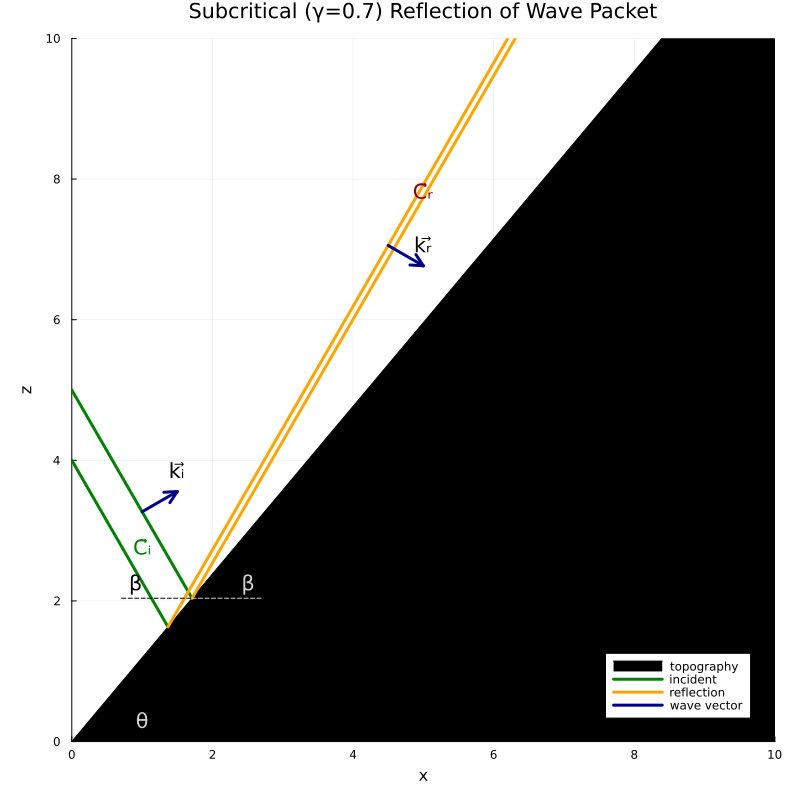

In [13]:
xt = 0:15

# function for topography line
ftopo(t) = tan(θr)*t

# where the incoming wave lines hit the topography
hit_point1 = 5.0/ (tan(θr)+tan(βr))
hit_point2 = 4.0/ (tan(θr)+tan(βr))

# function for incident wave lines 
fwave1(t) = 5.0 .- tan(βr).*t
fwave2(t) = 4.0 .- tan(βr).*t

# x values for incident wave lines
xw1 = 0:0.01:hit_point1
xw2 = 0:0.01:hit_point2

# functions for reflected waves
fwave1r(t) = -tan(-βr)*(t .- hit_point1) .+ fwave1(hit_point1)
fwave2r(t) = -tan(-βr)*(t .- hit_point2) .+ fwave2(hit_point2)

# x values for incident wave number vector
xki = 1:.01:1.5
# function for incident wave number vector
fki(t) = 1/tan(βr) .* (t .- 1) .+ fwave1(1)
# function for refkected wave number vector
fkr(t, xst, yst) = -1/tan(βr) .* (t .- xst) .+ yst

if γ > 1
    # reflected waves x values
    xwr1 = 0:0.01:hit_point1
    xwr2 = 0:0.01:hit_point2

    title = "Supercritical"
    
    # location of incident wave annotations
    c_inc = 1 # Cg 
    a_inc = -1.0 # beta 
    a_col = :black # color of beta line
    
    # wave number vector for reflected wave
    xkr = 1.0:-.01:0.5 # x values 
    kvecy_start = fwave1r(1) # y starting point 
    kvecx_start = 1 # x starting point
elseif γ == 1.0
    # reflected waves x values
    xwr1 = hit_point1:0.1:7
    xwr2 = hit_point2:0.1:7

    title = "Critical"

    # location of incident wave annotations
    c_inc = 4 #Cg
    a_inc = 1.0 #Beta
    a_col = :lightgray #Beta line
    
    # wave number vector for reflected wave
    xkr = 4.5: -0.01:4.0
    kvecy_start = fwave2r(4.5)
    kvecx_start = 4.5
else
    # reflected waves x values
    xwr1 = hit_point1:0.1:7
    xwr2 = hit_point2:0.1:7

    title = "Subcritical"
    
    # location of incident wave annotations
    c_inc = 5 #Cg 
    a_inc = 1.0 # Beta 
    a_col = :lightgray #Beta line
     
    # wave number vector for reflected wave
    xkr = 4.5: 0.01:5.0
    kvecy_start = fwave2r(4.5)
    kvecx_start = 4.5
end

big_title = title * @sprintf( " (γ=%0.1f) Reflection of Wave Packet", γ)

# plotting the topography
plot(xt,ftopo(xt), xlabel = "x", ylabel = "z", label = "topography", legend=:bottomright, 
    color = :black, fill=(0, :black), aspect_ratio=1, title = big_title, xlims = (0,10), 
    ylims = (0,10), size = (800,800))
annotate!([1], [0.3], ("θ", :lightgray))

# location of wave angles
xa = (hit_point1-1):0.1:hit_point1
ya = fwave1(hit_point1.*ones(length(xa)))

xa2 = hit_point1:.1:(hit_point1+1.)
ya2 = fwave1(hit_point1.*ones(length(xa2)))

# plotting the incident and reflected waves
plot!(xw1,fwave1(xw1), lw = 3, label = "incident", color = :green)
plot!(xw2,fwave2(xw2), lw = 3, label = "", color = :green)
plot!(xwr1,fwave1r(xwr1), lw = 3, label = "reflection", color = :orange)
plot!(xwr2,fwave2r(xwr2), lw = 3, label = "", color = :orange)

# plotting horizontal angle lines and incluyding wave angle location
plot!(xa, ya, lw = 1, color = :black, linestyle = :dash, label ="")
plot!(xa2, ya2, lw = 1, color = a_col, linestyle = :dash, label ="")
annotate!([hit_point1 - .8], [fwave1(hit_point1) + 0.22], ("β", :black))
annotate!([hit_point1  + (a_inc*0.8) ], [fwave1(hit_point1)  + (a_inc* 0.22)], ("β", a_col))

# annotating waves to include group velocity value
annotate!([1], [0.5.*(fwave1(1) + fwave2(1))], ("C⃗ᵢ", :green))
annotate!([c_inc], [0.5.*(fwave1r(c_inc) + fwave2r(c_inc))], ("C⃗ᵣ", :darkred))

# plotting and annotating wave number
plot!(xki, fki(xki), lw =3, label = "wave vector", color = :darkblue, arrow=true)
annotate!(xki[end], fki(xki[end]) .+.3, ("kᵢ⃗", :black))
plot!(xkr, fkr(xkr, kvecx_start, kvecy_start), lw =3, label = "", color = :darkblue, arrow=true)
annotate!(xkr[end], fkr(xkr[end],kvecx_start, kvecy_start).+0.3, ("kᵣ⃗", :black))

## Usual Domain set up 

In [14]:
Ñ = 3.5*10^(-3)
f = Ñ/10.7
σ = 2.2*f
Tanθ = sqrt((σ^2 - f^2)/(Ñ^2 - σ^2))
γ = 1.9
Tanα = γ * Tanθ

0.3555616354549337

In [15]:
# this is like our beta
θp = atan(Tanθ)
# like our theta (topo)
αp = atan(Tanα)

0.3416208881807369

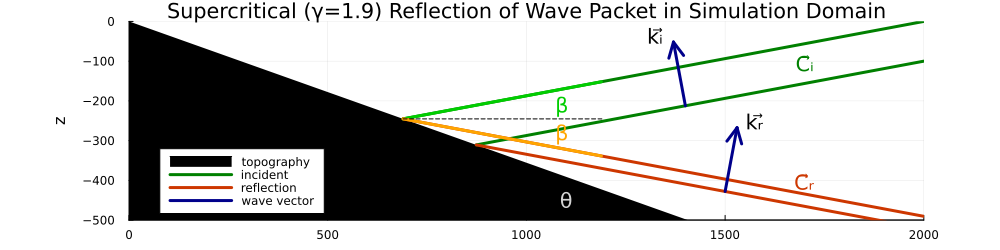

In [16]:
xt = 0:2000
ftopo(t) = - Tanα * t

# waves
hit_point1 = Tanθ*2000/(Tanθ + Tanα )
hit_point2 = (100+Tanθ*2000)/ (Tanα+Tanθ)

fwave1(t) = Tanθ.*(t .-  2000)
fwave2(t) = -100 .+ Tanθ.*(t .-  2000)

xw1 = hit_point1:2000
xw2 = hit_point2:2000

# reflected waves
fwave1r(t) = tan(-θp)*(t .- hit_point1) .+ fwave1(hit_point1)
fwave2r(t) = tan(-θp)*(t .- hit_point2) .+ fwave2(hit_point2)

# wave number vectors:
xki = 1400:-1:1370
xkr = 1500:1:1530

fki(t) = -1/Tanθ .* (t .- 1400) .+ fwave2(1400)
fkr(t) = -1/tan(-θp) .* (t .- 1500) .+ fwave2r(1500)

big_title = @sprintf( "Supercritical (γ=%0.1f) Reflection of Wave Packet in Simulation Domain", γ)

plot(xt, -500*ones(length(xt)), fillrange = ftopo(xt), xlabel = "y", ylabel = "z", label = "topography", 
    legend=:bottomleft, color = :black, aspect_ratio=1, title = big_title, xlims = (0,2000), 
    ylims = (-500,0), size = (1000,250))
annotate!([1100], [-450], ("θ", :lightgray))

# angles
xa = hit_point1:(hit_point1+500)
ya = fwave1(hit_point1.*ones(length(xa)))

# plotting the waves
plot!(xw1,fwave1(xw1), lw = 3, label = "incident", color = :green)
plot!(xw1[1:500],fwave1(xw1[1:500]), lw = 3, label = "", color = :green3)
plot!(xw2,fwave2(xw2), lw = 3, label = "", color = :green)
plot!(xw1,fwave1r(xw1), lw = 3, label = "reflection", color = :orangered3)
plot!(xw1[1:500],fwave1r(xw1[1:500]), lw = 3, label = "", color = :orange)
plot!(xw2,fwave2r(xw2), lw = 3, label = "", color = :orangered3)

# plotting angles
plot!(xa, ya, lw = 1, color = :black, linestyle = :dash, label ="")
annotate!([hit_point1 + 400], [fwave1(hit_point1) + 35], ("β", :green3))
annotate!([hit_point1  + 400], [-280], ("β", :orange))

# annotating waves
annotate!([1700], [0.5.*(fwave1(1700) + fwave2(1700))], ("C⃗ᵢ", :green))
annotate!([1700], [fwave1r(1700)+30], ("C⃗ᵣ", :orangered3))

# plotting and annotating wave number
plot!(xki, fki(xki), lw =3, label = "wave vector", color = :darkblue, arrow=true)
annotate!(xki[end]-45, fki(xki[end]) .+ 15, ("kᵢ⃗", :black))
plot!(xkr, fkr(xkr), lw =3, label = "", color = :darkblue, arrow=true)
annotate!(xkr[end]+45, fkr(xkr[end]).+ 15, ("kᵣ⃗", :black))